**Randomwalk Assessment**

In [1]:
import pandas as pd
penguins = pd.read_csv('/Users/ajaynarayan/Desktop/dataset.csv')

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [4]:
print("Graph to find the Missing value")
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(penguins.isnull(), cbar=False)
plt.show()

Graph to find the Missing value


ModuleNotFoundError: No module named 'seaborn'

In [36]:
print("Missing Data:")
print(penguins.isnull().sum())

Missing Data:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [37]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [38]:
#Imputing the missing numerical values with mean
numerical_column = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
for col in numerical_column:
  penguins[col] = penguins[col].fillna(penguins[col].mean())

#Imputing the missing categorical values with mode
categorical_column = ['species','island','sex']
for col in categorical_column:
  penguins[col] = penguins[col].fillna(penguins[col].mode()[0])


In [47]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.500000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.300000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.876855,17.15117,200.915205,4273.976608,Male
4,Adelie,Torgersen,36.700000,19.30000,193.000000,3450.000000,Female


In [39]:
print("Missing Data:")
print(penguins.isnull().sum())

Missing Data:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [40]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.422408,1.969027,14.020657,1115.961772
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,43.876855,17.300000,197.000000,4050.000000
75%,48.400000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,15000.000000


In [41]:
for column in ['species', 'island', 'sex']:
    print(f"{column}: {penguins[column].unique()}")

species: ['Adelie' 'Gentoo' 'Chinstrap']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['male' 'female' 'unknown']


In [45]:
penguins['sex'] = penguins['sex'].str.capitalize()
penguins['sex'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [48]:
gentoo = penguins[penguins['species'] == 'Gentoo']
avg_body_mass_g = gentoo['body_mass_g'].mean()
print(avg_body_mass_g)

5126.806262969251


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

Outliers in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in bill_depth_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in flipper_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in body_mass_g:
        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    Male  
206      12000.0  Female  
324      10000.0    Male  


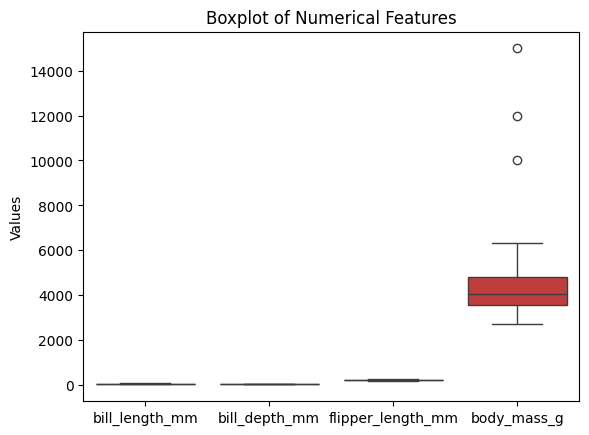

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using IQR to detect outliers
def detect_outliers(penguins, column):
    Q1 = penguins[column].quantile(0.25)
    Q3 = penguins[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return penguins[(penguins[column] < lower_bound) | (penguins[column] > upper_bound)]

# Detect outliers
outlier_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in outlier_columns:
    outliers = detect_outliers(penguins, col)
    print(f"Outliers in {col}:\n", outliers)

# Visualize outliers
sns.boxplot(data=penguins[outlier_columns])
plt.title("Boxplot of Numerical Features")
plt.ylabel("Values")
plt.xticks(ticks=range(len(outlier_columns)), labels=outlier_columns)
plt.show()


<ipython-input-60-58ad7bd4a814>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=penguins[col], order=low_freq_categories, palette='Set2')


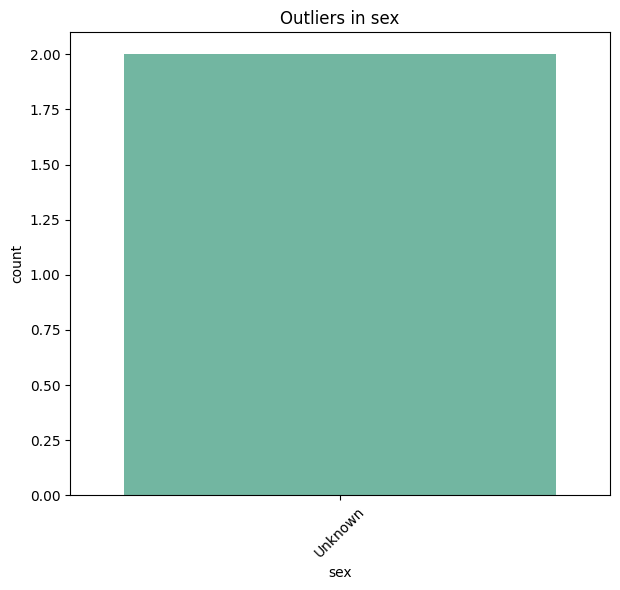

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers based on category frequency
def detect_categorical_outliers(df, categorical_cols):
    outliers = {}
    for col in categorical_cols:
        category_counts = df[col].value_counts()
        # Identifying categories that appear in less than 5% of the data
        low_frequency_categories = category_counts[category_counts < 0.05 * len(df)]
        outliers[col] = low_frequency_categories.index.tolist()

    return outliers

# Define the categorical columns
categorical_cols = ['species', 'island', 'sex']

# Detecting categorical outliers
categorical_outliers = detect_categorical_outliers(penguins, categorical_cols)

# Visualizing outliers in categorical data using countplots
plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_cols):
    low_freq_categories = categorical_outliers[col]
    if low_freq_categories:  # Only plot if there are outliers
        plt.subplot(1, len(categorical_cols), i + 1)
        sns.countplot(x=penguins[col], order=low_freq_categories, palette='Set2')
        plt.title(f'Outliers in {col}')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

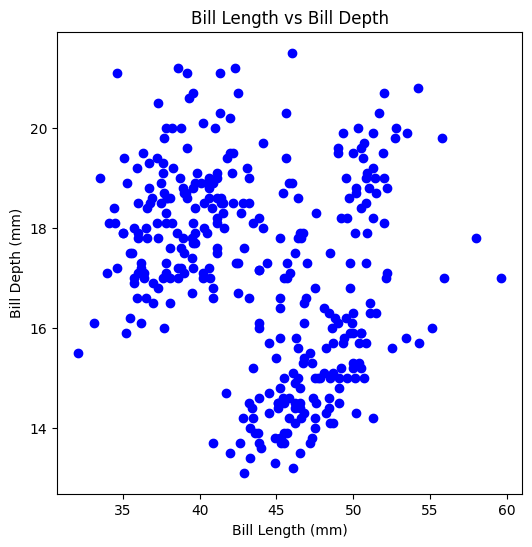

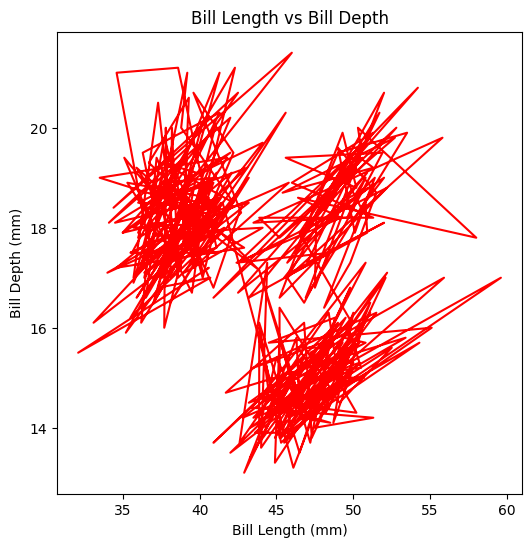

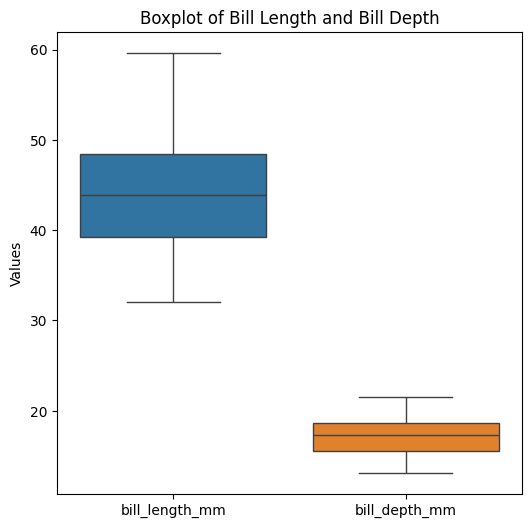

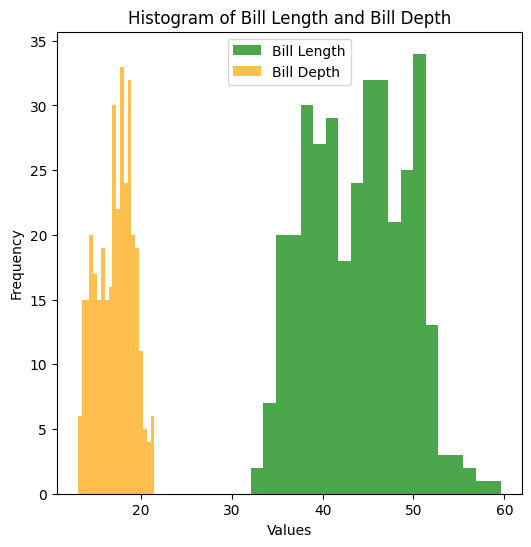

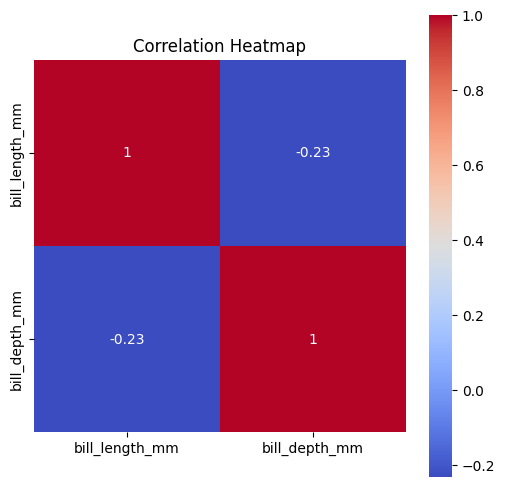

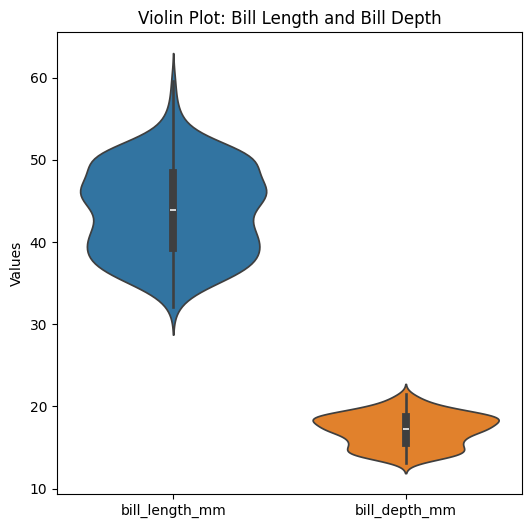

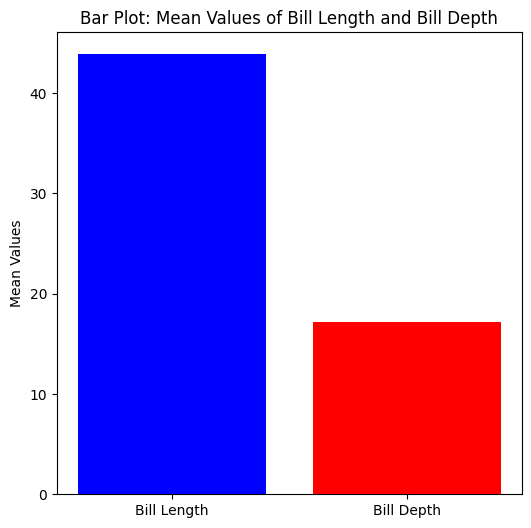

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(penguins['bill_length_mm'], penguins['bill_depth_mm'], color='blue')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Line plot
plt.figure(figsize=(6, 6))
plt.plot(penguins['bill_length_mm'], penguins['bill_depth_mm'], color='red')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=penguins[['bill_length_mm', 'bill_depth_mm']])
plt.title('Boxplot of Bill Length and Bill Depth')
plt.ylabel('Values')
plt.show()

# Histogram
plt.figure(figsize=(6, 6))
plt.hist(penguins['bill_length_mm'], bins=20, color='green', alpha=0.7, label='Bill Length')
plt.hist(penguins['bill_depth_mm'], bins=20, color='orange', alpha=0.7, label='Bill Depth')
plt.title('Histogram of Bill Length and Bill Depth')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Heatmap
plt.figure(figsize=(6, 6))
corr = penguins[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Violin plot
plt.figure(figsize=(6, 6))
sns.violinplot(data=penguins[['bill_length_mm', 'bill_depth_mm']])
plt.title('Violin Plot: Bill Length and Bill Depth')
plt.ylabel('Values')
plt.show()

# Bar plot (mean values)
plt.figure(figsize=(6, 6))
categories = ['Bill Length', 'Bill Depth']
means = [penguins['bill_length_mm'].mean(), penguins['bill_depth_mm'].mean()]
plt.bar(categories, means, color=['blue', 'red'])
plt.title('Bar Plot: Mean Values of Bill Length and Bill Depth')
plt.ylabel('Mean Values')
plt.show()

Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [55]:
# Grouping the data by species and island, then finding the maximum flipper_length_mm
max_flippers = penguins.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Displaying the maximum flipper length for each species and island combination
print("Maximum flipper length for each species and island combination:")
print(max_flippers)

# Finding the species with the longest flippers for each island
longest_flippers_by_island = (
    max_flippers.loc[max_flippers.groupby('island')['flipper_length_mm'].idxmax()]
)

# Displaying the species with the longest flippers on each island
print("\nSpecies with the longest flippers on each island:")
print(longest_flippers_by_island)



Maximum flipper length for each species and island combination:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


Q8: Perform z-score normalization on this dataset. (code)

In [65]:
from sklearn.preprocessing import StandardScaler

# Step 1: Identify continuous and categorical columns
continuous_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_columns = ['species', 'island', 'sex']

# Step 2: Apply Z-score normalization to continuous columns
scaler = StandardScaler()
penguins[continuous_columns] = scaler.fit_transform(penguins[continuous_columns])

# Step 3: One-hot encode the categorical columns
df_encoded = pd.get_dummies(penguins, columns=categorical_columns, drop_first=True)

# Step 4: Display the normalized and encoded dataset
print(df_encoded.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       -0.882230       0.787743          -1.422488    -0.470213   
1       -0.808355       0.126556          -1.065352    -0.425343   
2       -0.660604       0.431719          -0.422507    -0.918910   
3        0.000000       0.000000           0.000000     0.000000   
4       -1.325483       1.092905          -0.565361    -0.739431   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  \
0              False           False         False              True   
1              False           False         False              True   
2              False           False         False              True   
3              False           False         False              True   
4              False           False         False              True   

   sex_Male  sex_Unknown  
0      True        False  
1     False        False  
2     False        False  
3      True        False  
4     False        Fals